**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import LabelEncoder

matplotlib.style.use('ggplot') 

In [36]:
adult = pd.read_csv("../../assets/datasets/adult.csv")
numerical = adult[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [6]:
dummies = pd.get_dummies(adult.drop('income', axis = 1))
temp = []
for x in adult['income']:
    if x == 'large':
        temp.append(1)
    else:
        temp.append(0)
dummies['income'] = temp
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 106 entries, age to income
dtypes: float64(99), int64(7)
memory usage: 39.5 MB


**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

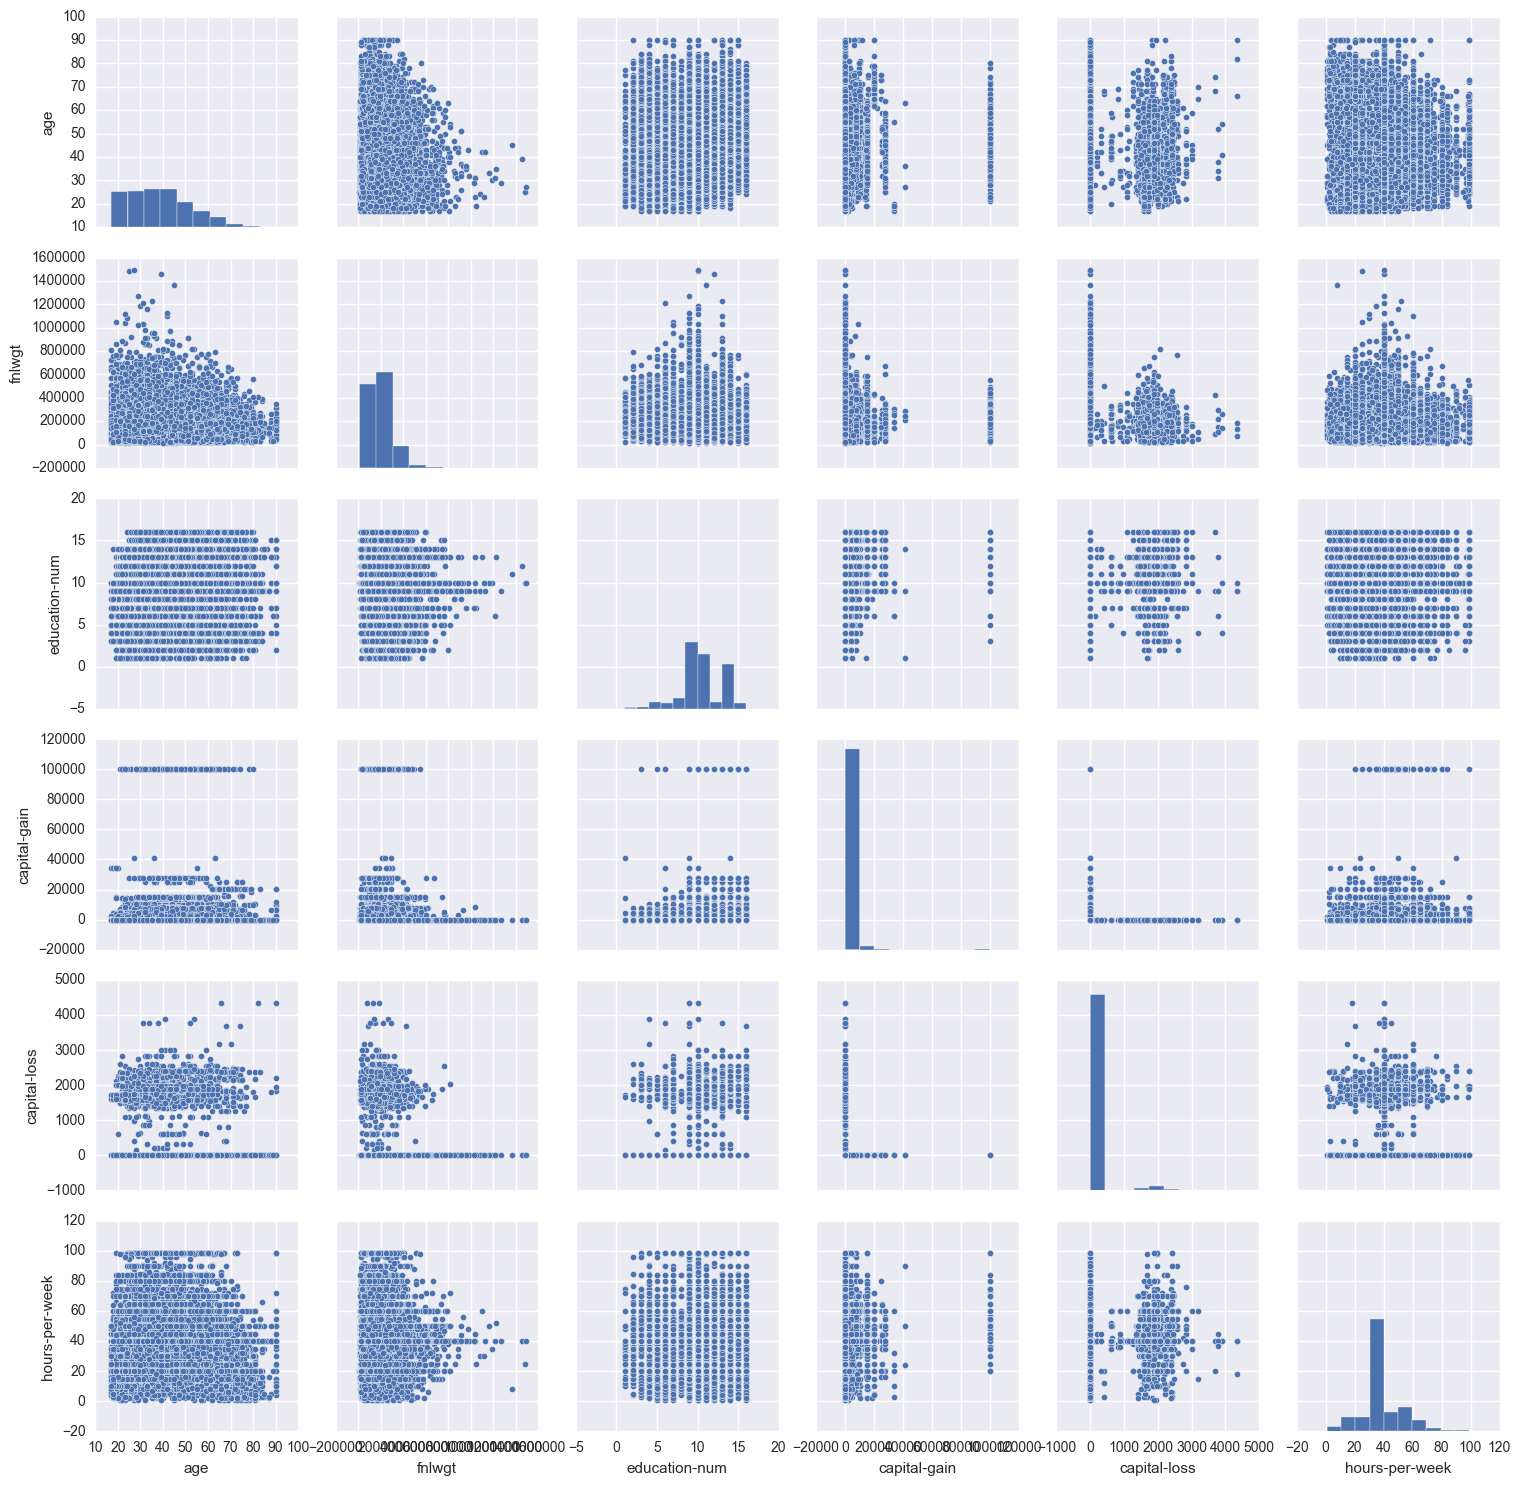

In [14]:
import seaborn as sns
adult.head()
sns.pairplot(adult)

In [5]:
for i in adult:
    le = LabelEncoder()
    adult[i] = le.fit_transform(adult[i])

/Users/jroyalty/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


/Users/jroyalty/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

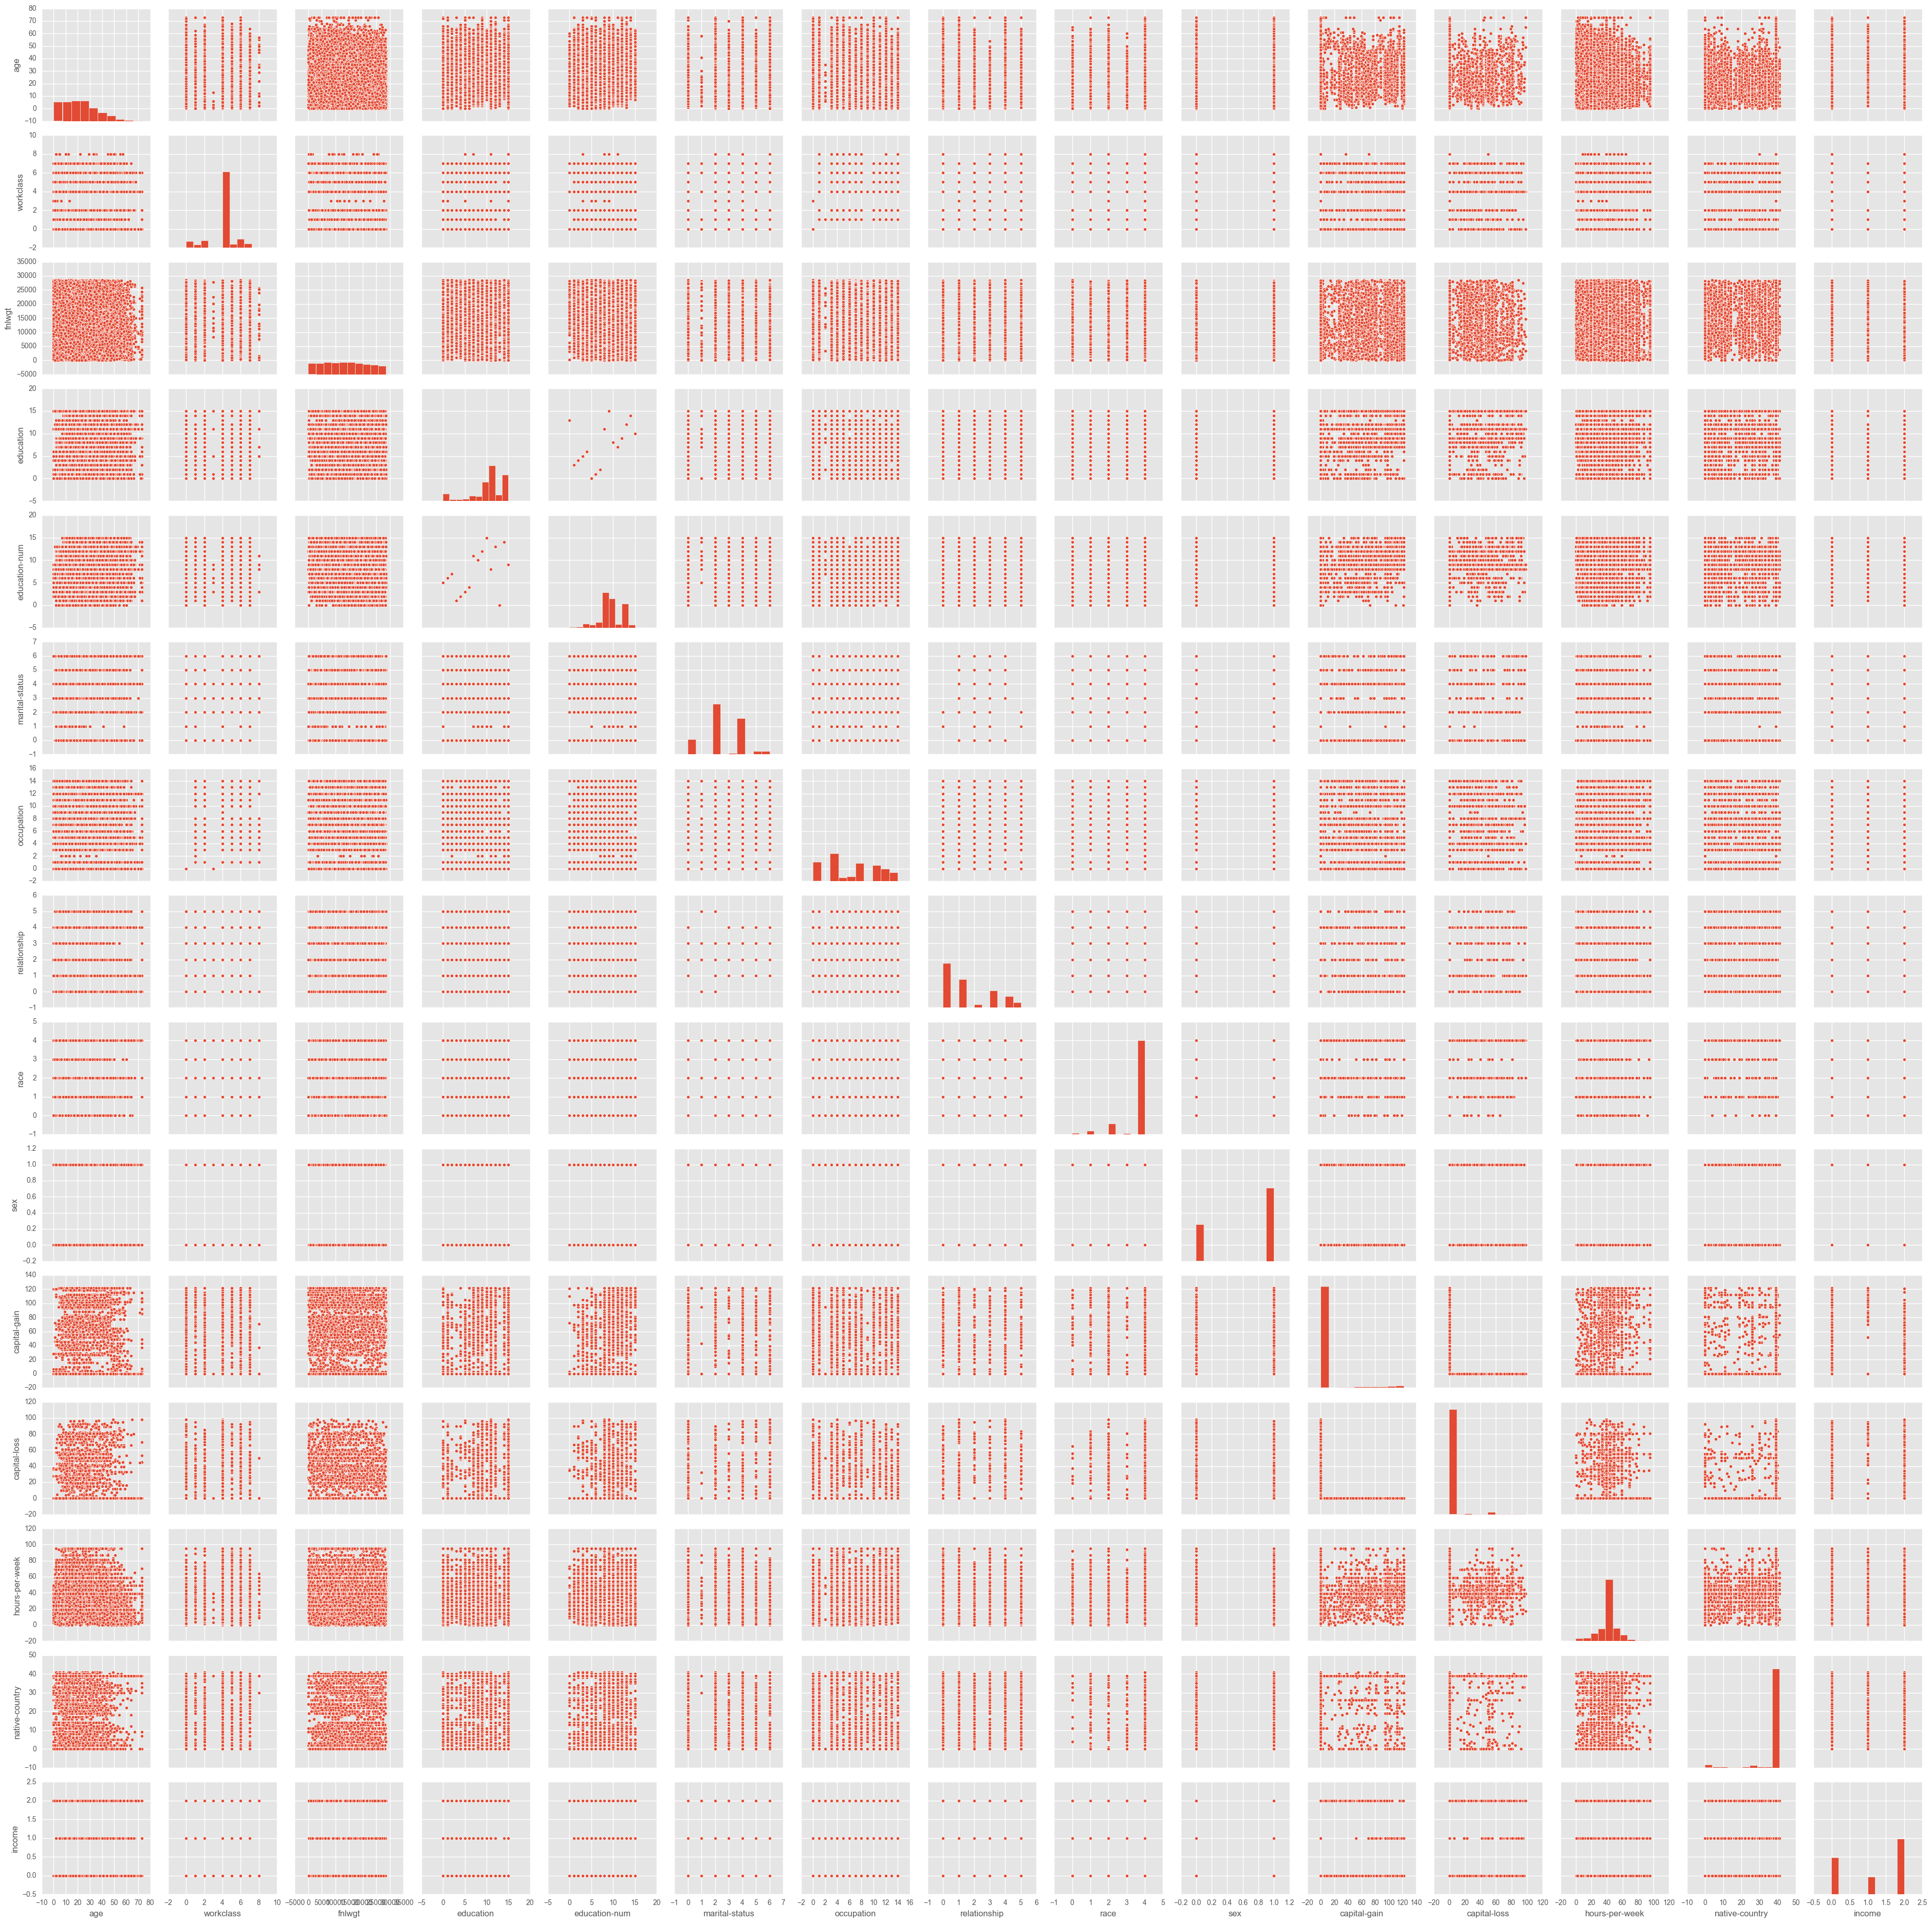

In [18]:
#sns.pairplot(adult)

Check for NaN and Infinite Numbers - Our data is messy!

In [37]:
# np.any(np.isnan(numerical))
numerical.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Convert to the Pandas Array to a Numpy Matrix - Your function will only take numerical inputs

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(numerical)
X = pd.DataFrame(X)
dn = X.as_matrix(columns=None)
X.head()



,0,1,2,3,4,5
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087


**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [44]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [45]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print centroids
# need to transform back to usable numbers

[[  2.28676180e-01  -1.33762731e-02   3.57893166e-01  -1.44803531e-01
    4.49349997e+00   2.35784040e-01]
 [ -1.09814027e-02   6.42350427e-04  -1.71866129e-02   6.95370145e-03
   -2.15785189e-01  -1.13227337e-02]]


Compute the Silhoutte Score to measure your analysis

In [ ]:
#metrics.silhouette_score(dn, labels, metric='euclidean')